In [64]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def Test_show(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,20,80,80)
    I_blur_bilateralFilter = 255 - blur_bilateralFilter
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(I_blur_bilateralFilter)
    
    plt.show()
    
def Test_get(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,20,80,80)
    I_blur_bilateralFilter = 255 - blur_bilateralFilter
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(I_blur_bilateralFilter)
    
    plt.show()
    
    return [img,blur_bilateralFilter,I_blur_bilateralFilter]

def Test_get_2(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,10,80,80)
    re_blur_bilateralFilter = cv2.bilateralFilter(blur_bilateralFilter,10,80,80)
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(re_blur_bilateralFilter)
    
    plt.show()
    
    return [img,blur_bilateralFilter,re_blur_bilateralFilter]

def GaussianBlur(img,ksize):
    blur = cv2.GaussianBlur(img,ksize=(ksize,ksize),sigmaX=0)
    edged  = cv2.Canny(blur,10,250)
    return edged


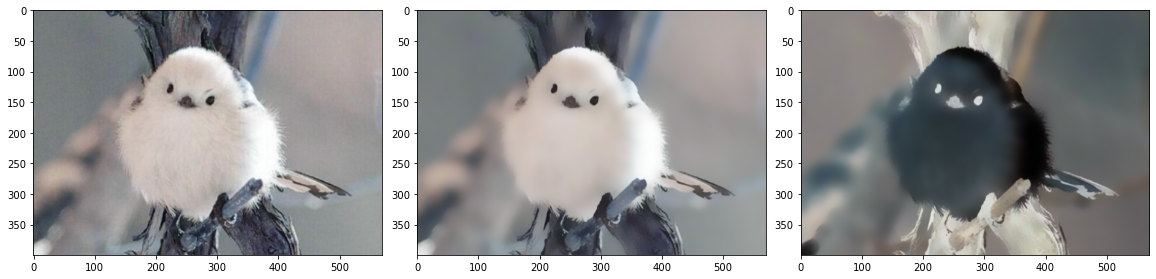

In [3]:
Test_show('C:/Users/admin/Downloads/QuteBird.jpg')

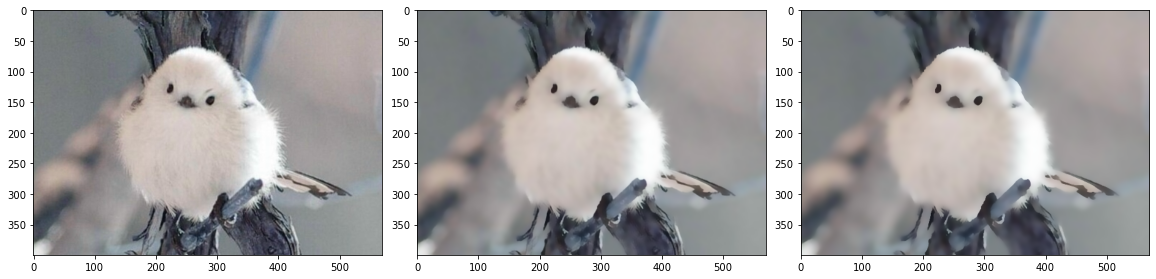

In [4]:
a = Test_get_2('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')

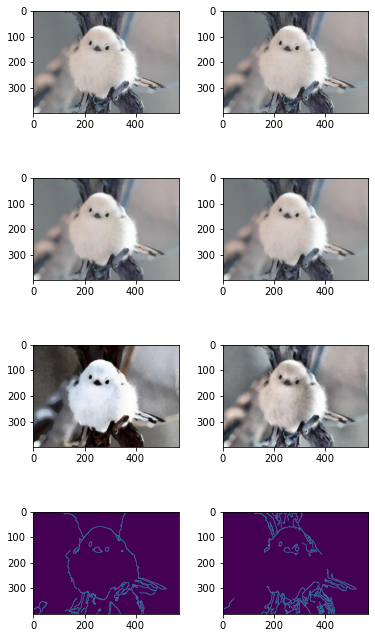

In [5]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)


# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_rgb = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

# 이미지 타일별 히스토그램 균일화
lab = cv2.cvtColor(median, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
limg = cv2.merge([cl,a,b])
enhanced_tile = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)






f, axes = plt.subplots(4, 2)
f.set_size_inches((6, 12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_rgb)
axes[3,0].imshow(GaussianBlur(enhanced_rgb,1))



axes[0,1].imshow(origin)
axes[1,1].imshow(median)
axes[2,1].imshow(enhanced_tile)
axes[3,1].imshow(GaussianBlur(enhanced_tile,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

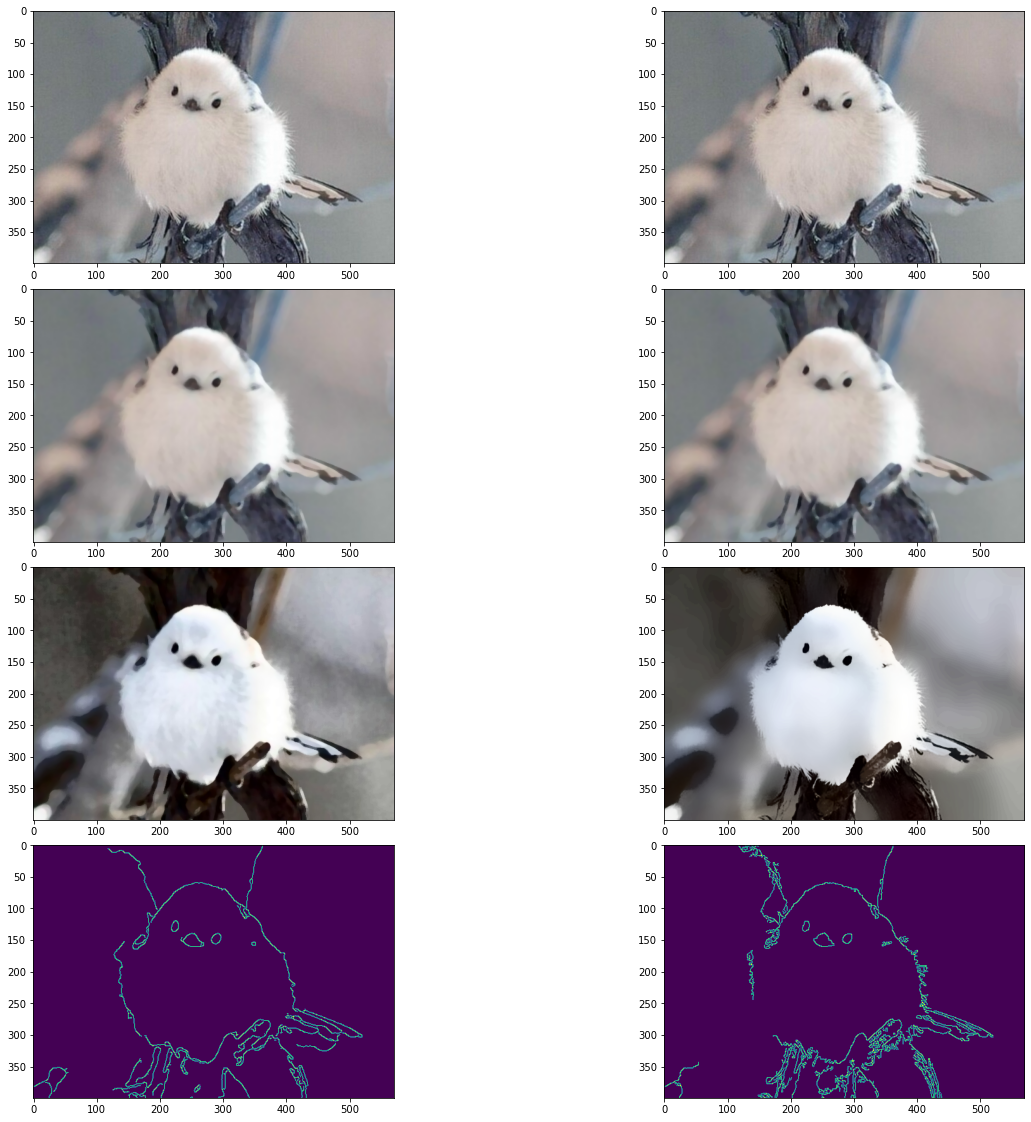

In [9]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
bilateral = cv2.bilateralFilter(origin,40,80,80)

# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

enhanced_yuv = cv2.cvtColor(bilateral, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_bilateral = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)



f, axes = plt.subplots(4, 2)
f.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_median)
axes[3,0].imshow(GaussianBlur(enhanced_median,1))



axes[0,1].imshow(origin)
axes[1,1].imshow(median)
axes[2,1].imshow(enhanced_bilateral)
axes[3,1].imshow(GaussianBlur(enhanced_bilateral,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

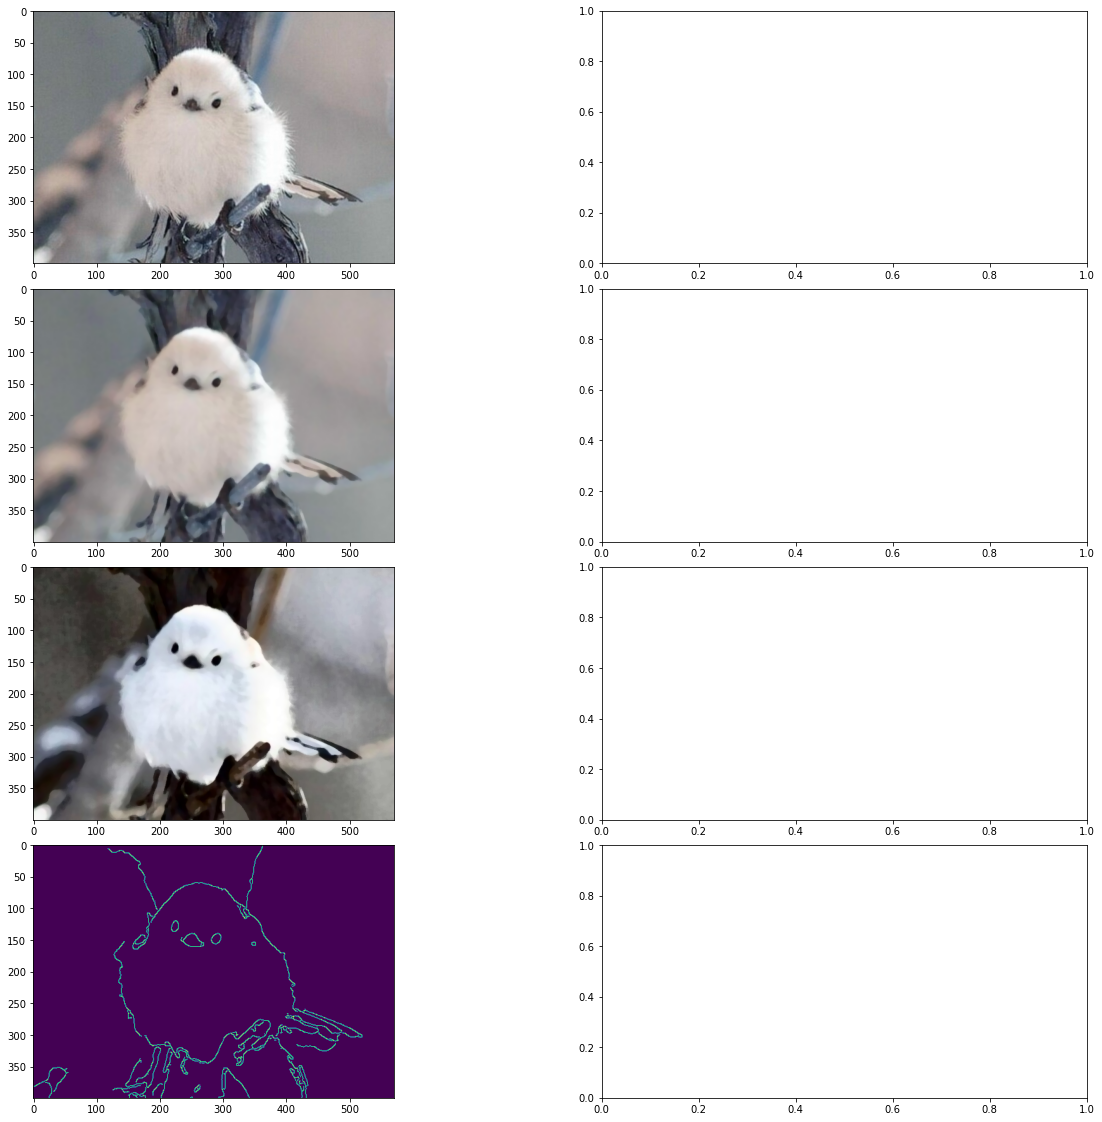

In [46]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
median_sq = median.copy()
median_sq = median_sq ** (median_sq/2)

# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)



f, axes = plt.subplots(4, 2)
f.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_median)
axes[3,0].imshow(GaussianBlur(enhanced_median,1))






# axes[0,1].imshow(origin)
# axes[1,1].imshow(median_sq)
# # axes[3,1].imshow(GaussianBlur(median_sq,1))

# axes[2,1].imshow(enhanced_bilateral)
# axes[3,1].imshow(GaussianBlur(enhanced_bilateral,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

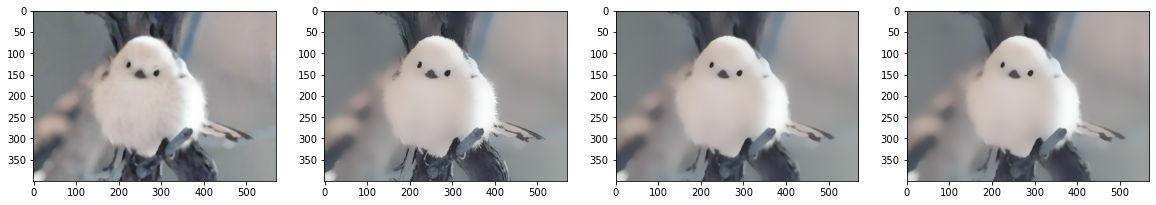

In [52]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
bilateral = cv2.bilateralFilter(origin,40,80,80)

M_B = cv2.medianBlur(bilateral,7)
B_M = cv2.bilateralFilter(median,40,80,80)


f,ax = plt.subplots(1,4)
f.set_size_inches((20, 5))
ax[0].imshow(median)
ax[1].imshow(bilateral)
ax[2].imshow(M_B)
ax[3].imshow(B_M)

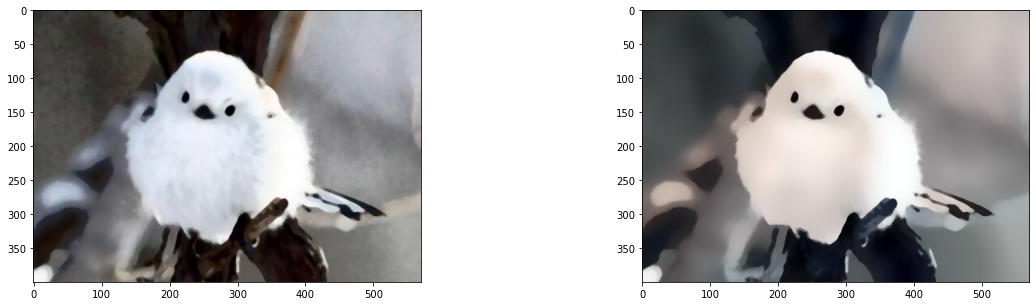

In [58]:
median = cv2.medianBlur(origin,7)
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

M_B = cv2.bilateralFilter(median,40,80,80)
enhanced_yuv = cv2.cvtColor(M_B, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
M_B = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)




f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(median)
ax[1].imshow(M_B)

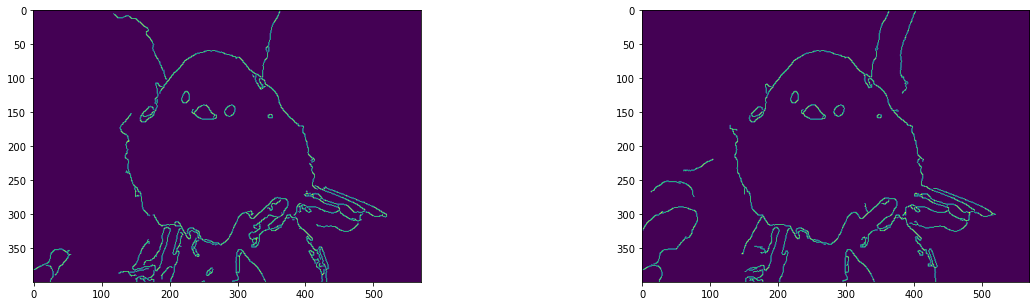

In [60]:
f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(GaussianBlur(median,1))
ax[1].imshow(GaussianBlur(M_B,1))

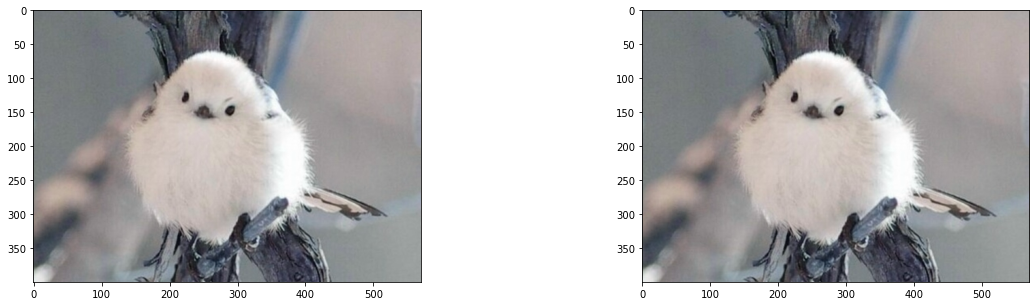

In [66]:

pil_image=Image.fromarray(cv2.cvtColor(origin, cv2.COLOR_BGR2RGB))



numpy_image=np.array(pil_image)


opencv_image=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)




f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(origin)
ax[1].imshow(opencv_image)

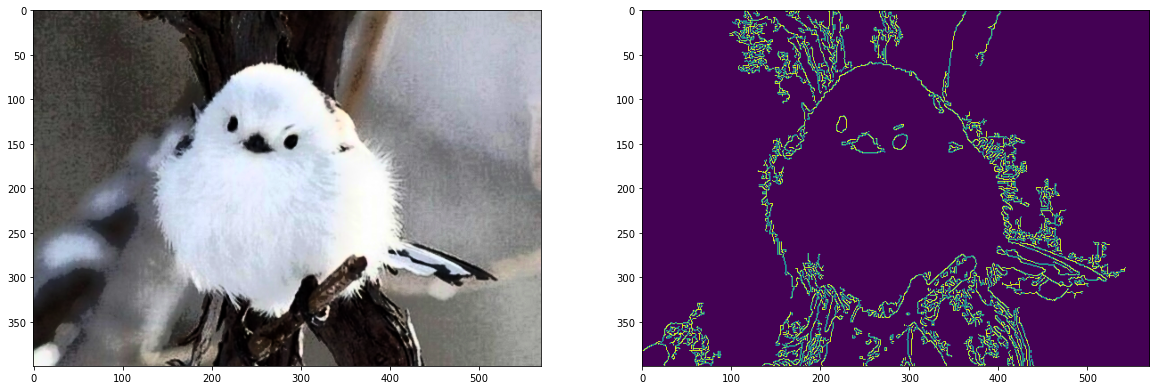

In [144]:
temp = origin.copy()
temp = temp**1.9999999999999
img_s = temp/(np.max(temp)/255)
img_s = img_s.astype(np.uint8)

enhanced_yuv = cv2.cvtColor(img_s, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
final = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

f,ax = plt.subplots(1,2)
f.set_size_inches((20, 10))
ax[0].imshow(final)
ax[1].imshow(GaussianBlur(final,1))



# median = cv2.medianBlur(img_s,7)
# bilateral = cv2.bilateralFilter(img_s,40,80,80)

# M_B = cv2.medianBlur(bilateral,7)
# B_M = cv2.bilateralFilter(median,40,80,80)


# f,ax = plt.subplots(2,2)
# f.set_size_inches((20, 10))
# ax[0,0].imshow(median)
# ax[0,1].imshow(bilateral)
# ax[1,0].imshow(GaussianBlur(median,1))
# ax[1,1].imshow(GaussianBlur(bilateral,1))

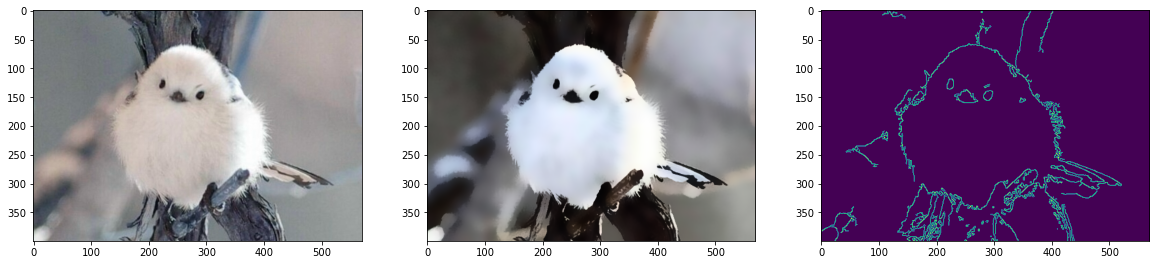

In [196]:


def image_square(temp):
    temp = temp**1.9999999999999
    img_s = temp/(np.max(temp)/255)
    return img_s.astype(np.uint8)


def image_enhanced(temp):
    enhanced_yuv = cv2.cvtColor(temp, cv2.COLOR_BGR2YUV)
    enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
    return cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)


origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')


def Beta_1(img):
    median =  cv2.medianBlur(img,1)
    BES = cv2.bilateralFilter(image_enhanced(image_square(img)),20,80,80)
    Gau = GaussianBlur(BES,1)
    return(img,BES,Gau)
#     f,ax = plt.subplots(1,3)
#     f.set_size_inches((20, 10))
#     ax[0].imshow(img)
#     ax[1].imshow(BES)
#     ax[2].imshow(Gau)

t = Beta_1(origin)


f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])


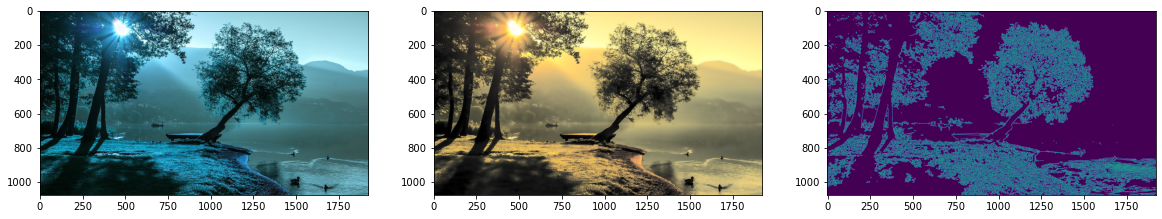

In [197]:
t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/tree.jpg',cv2.IMREAD_COLOR))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])

True

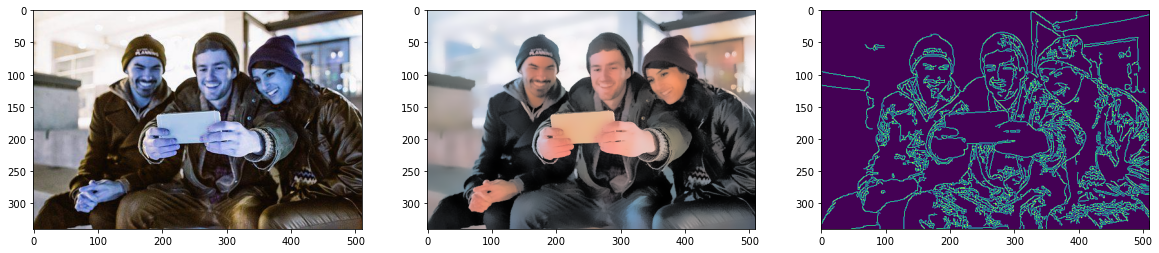

In [198]:

t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])
cv2.imwrite('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1_Analysis.jpg',t[2])

In [192]:


t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])

(array([[[164, 149, 157],
         [164, 149, 157],
         [164, 149, 157],
         ...,
         [125,  95,  84],
         [125,  96,  82],
         [125,  96,  82]],
 
        [[164, 149, 157],
         [164, 149, 157],
         [164, 149, 157],
         ...,
         [125,  95,  84],
         [125,  96,  82],
         [125,  96,  82]],
 
        [[164, 149, 157],
         [164, 149, 157],
         [164, 149, 157],
         ...,
         [125,  95,  84],
         [125,  95,  84],
         [124,  94,  83]],
 
        ...,
 
        [[  4,   2,   1],
         [  4,   2,   1],
         [  5,   3,   2],
         ...,
         [ 21,  13,  14],
         [ 21,  13,  14],
         [ 22,  14,  15]],
 
        [[  5,   4,   0],
         [  5,   4,   0],
         [  6,   4,   3],
         ...,
         [ 21,  13,  14],
         [ 21,  13,  14],
         [ 22,  14,  15]],
 
        [[  8,   7,   3],
         [  8,   7,   3],
         [  9,   7,   6],
         ...,
         [ 21,  13,  14],
  

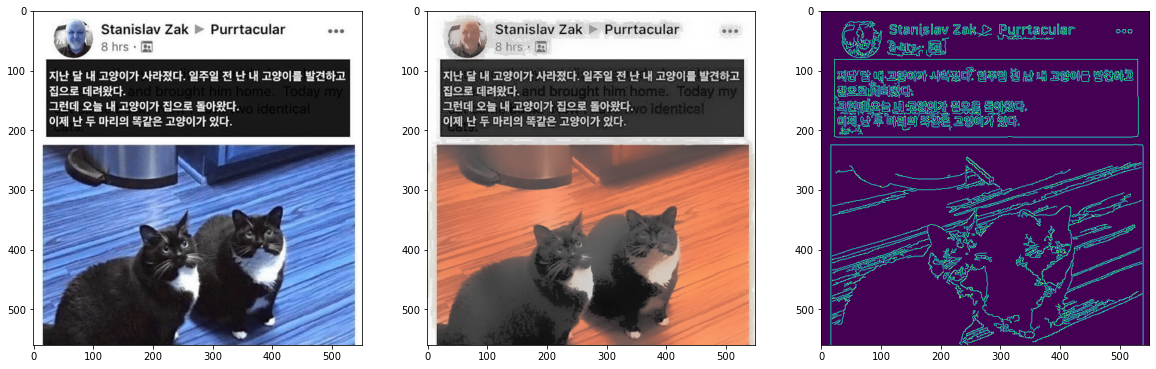

In [194]:
t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/cat_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])

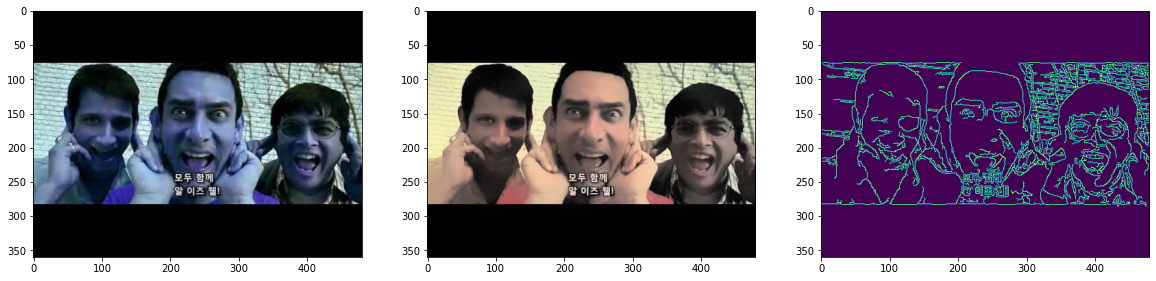

In [195]:
t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/Humen_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])